## Importing the required libs

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Reading the given dataset and Understanding the data

In [324]:
df = pd.read_csv(r"C:\Users\JEYA KUMAR R\Downloads\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### About the Data:

In [325]:
print("-----------------------------------------------------")
print("Is the basic Info of the given Dataset".format(df.info()))
print("-----------------------------------------------------")
print("The shape of the dataset is {} (rows and columns)".format(df.shape))
print("-----------------------------------------------------")
print("The Number of Unique values present in the dataset is: ")
print(df.nunique())

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
Is the basic Info of the given Dataset


In [326]:
des_stat  = df.describe()
des_stat.loc['range'] = des_stat.loc['max'] - des_stat.loc['min']
des_stat.loc['variance'] = df.var()

fields = ['count','mean','min','max','range','25%','50%','75%','std','variance']
descriptive_statistics = des_stat.loc[fields]
descriptive_statistics.rename({'25%':'1st quartile','50%':'median','75%':'3rd quartile'},inplace = True)
print('The Descriptive Statistics of the given data is:')
descriptive_statistics

The Descriptive Statistics of the given data is:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02,7.300000e+02
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3.658758e+03,4.508007e+03
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,2.000000e+01,2.200000e+01
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6.946000e+03,8.714000e+03
range,729.000000,3.000000,1.000000,11.000000,1.000000,6.000000,1.000000,2.000000,32.904001,38.091320,97.250000,32.499777,3408.000000,6.926000e+03,8.692000e+03
1st quartile,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2.502250e+03,3.169750e+03
median,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3.664500e+03,4.548500e+03
3rd quartile,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4.783250e+03,5.966000e+03
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1.559759e+03,1.936012e+03
variance,44469.166667,1.232508,0.250343,11.903986,0.027978,4.001355,0.214037,0.296815,56.350979,66.427517,202.708942,26.996761,471254.618141,2.432847e+06,3.748141e+06


**Insights:**
- **730 rows and 16 columns.**
- **from data dictionary we understood that:**
    - instant is just a record index, this column can be removed.
    - dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.
    - addition of casual and registered columns gives cnt column, and we will not going to get much information from these columns, thus we wil drop these two as well.
- **there seems to be no missing values from non-null value count.**
- **TARGET variable/column is 'cnt'**

### Checking all the columns

In [327]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Renaming columns for better visibility

In [328]:
df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

### checking new names

In [329]:
df.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Cleaning Data

##### Droping instant column as it is index column which has nothing to do with target

In [330]:
df.drop(['instant'], axis = 1, inplace = True)

#### Dropping dteday as we have already have month and weekday columns to work with

In [331]:
df.drop(['dteday'], axis = 1, inplace = True)

#### Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

In [332]:
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

### Inspect data frame after dropping

In [333]:
df.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory Data Analysis

### Handle Missing values

In [334]:
df.isna().sum()

Season        0
Year          0
Month         0
holiday       0
weekday       0
workingday    0
Weather       0
temp          0
atemp         0
Humidity      0
windspeed     0
Count         0
dtype: int64

There is no null values

### Handle Outliers

#### Draw box plots for indepent variables with continuous values

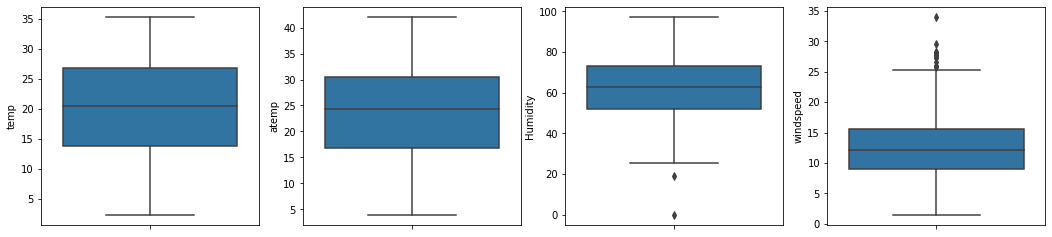

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['temp', 'atemp', 'Humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

**As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.**
- **Binary Types : Year, holiday, workingday**
- **Categorical Types: Season, Month, weekday, Weather**
- **Numeric types: temp, atemp, Humidity, windspeed, Count**

#### mapping proper names for better visibilty

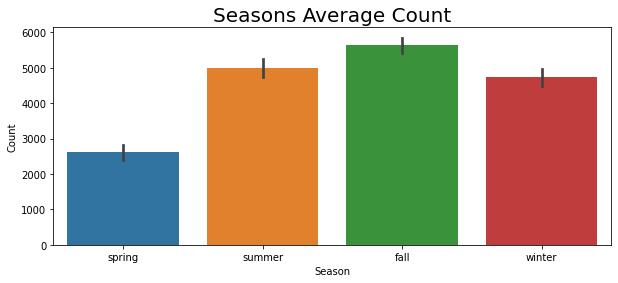

In [336]:
# season (1:spring, 2:summer, 3:fall, 4:winter)

df['Season'] = df['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})


# Visualising Seasons count of rented bikes

plt.figure(figsize=[10,4])
sns.barplot(df['Season'],df['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

**Insights:**
- **In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter**
- **Spring seems to be the least season where people rent bikes**

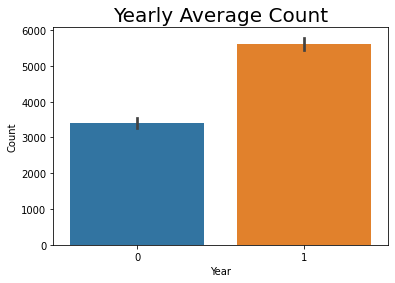

In [337]:
# Visualising Yearly count of rented bikes

sns.barplot(df['Year'],df['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

**Insights:**
- **We can observe a trend here, average rented bikes has increased in 2019 almost double that of 2018**

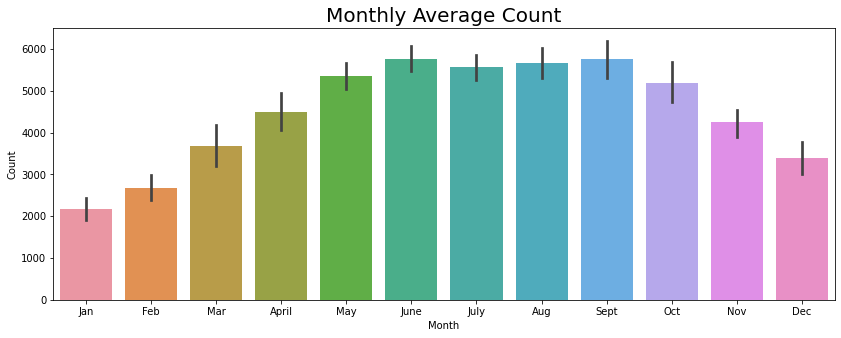

In [338]:
df['Month'] = df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(df['Month'],df['Count'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

**Insights:**
- **More and almost similar average count of rented bikes in  June, July, August, September followed by May, October. Company should make sure they prepare with high availability during these months**
- **December, January, February have the least demand probably due to winter season**

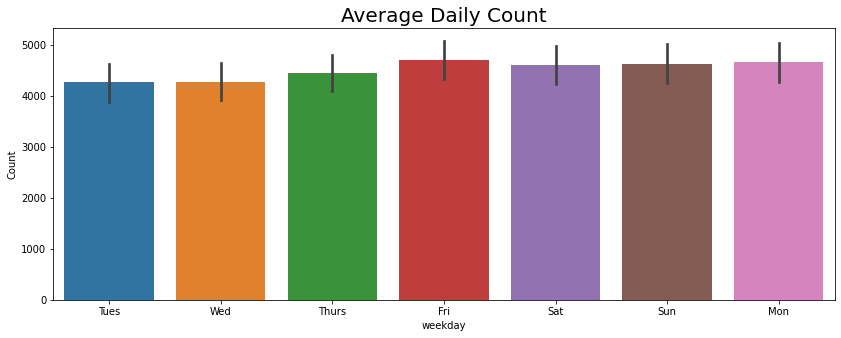

In [339]:
df['weekday'] = df['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(df['weekday'],df['Count'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

**Insights:**
- **looks like all days have similar demands, but still Sunday, Monday, Saturday, Friday has high demands than other days**
- **People less prefer rented bike on Thrusday, Wednesday,Tuesday**

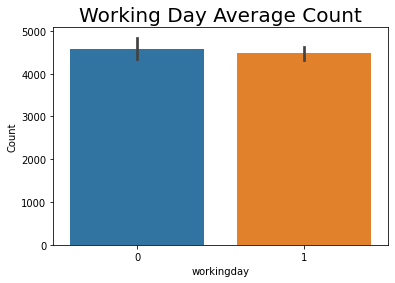

In [340]:
# Visualising Working day count of rented bikes

sns.barplot(df['workingday'],df['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

**Insights:**
- **There are similar demands whether it's a working day or not.**

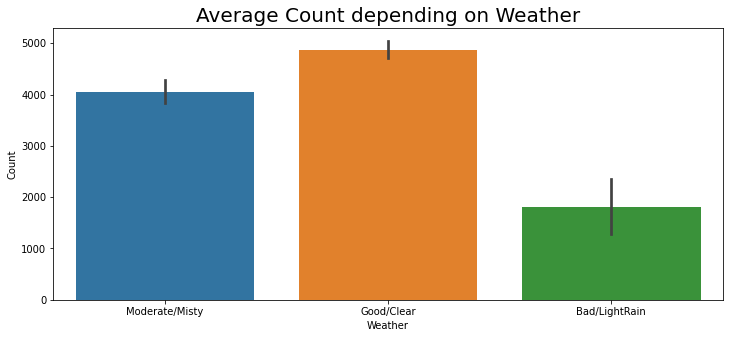

In [341]:
#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain


df['Weather'] = df['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


# Visualising Daily count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(df['Weather'],df['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

**Insights:**
- **It clearly shows that if the weather is clear, the demand is more**
- **If the weather is bad, demand decreases drastically**
- **Company should leverage and look up for forecast of weather to fullfill demands**

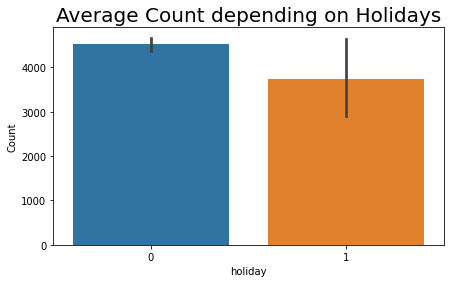

In [342]:
# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[7,4])
sns.barplot(df['holiday'],df['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

**Insights:**
- **There is high decrease of demand if it is a holiday**

### Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

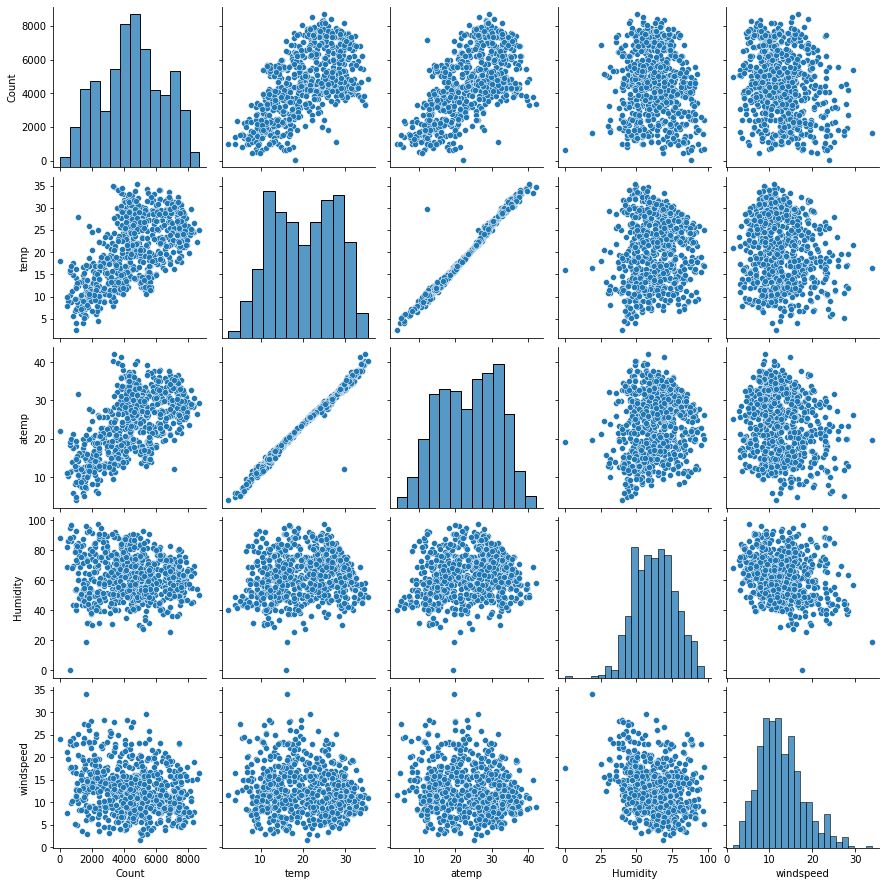

In [343]:
#Draw pairplots for continuous numeric variables using seaborn

plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['Count', 'temp', 'atemp', 'Humidity','windspeed'])
plt.show()

**Insights:**
- **Looks like the temp and atemp has the highest corelation with the target variable cnt**
- **temp and atemp are highly co-related with each other**
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

-----
**Independent variables which could be a good predictor from EDA are:**
- **temp**
- **Weather**
- **Months**
- **Seasons**
- **workingday**

### Checking continuous variables relationship with each other

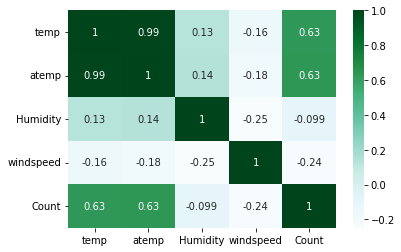

In [344]:
sns.heatmap(df[['temp','atemp','Humidity','windspeed','Count']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

### Analysing Categorical Variabels with target variables 

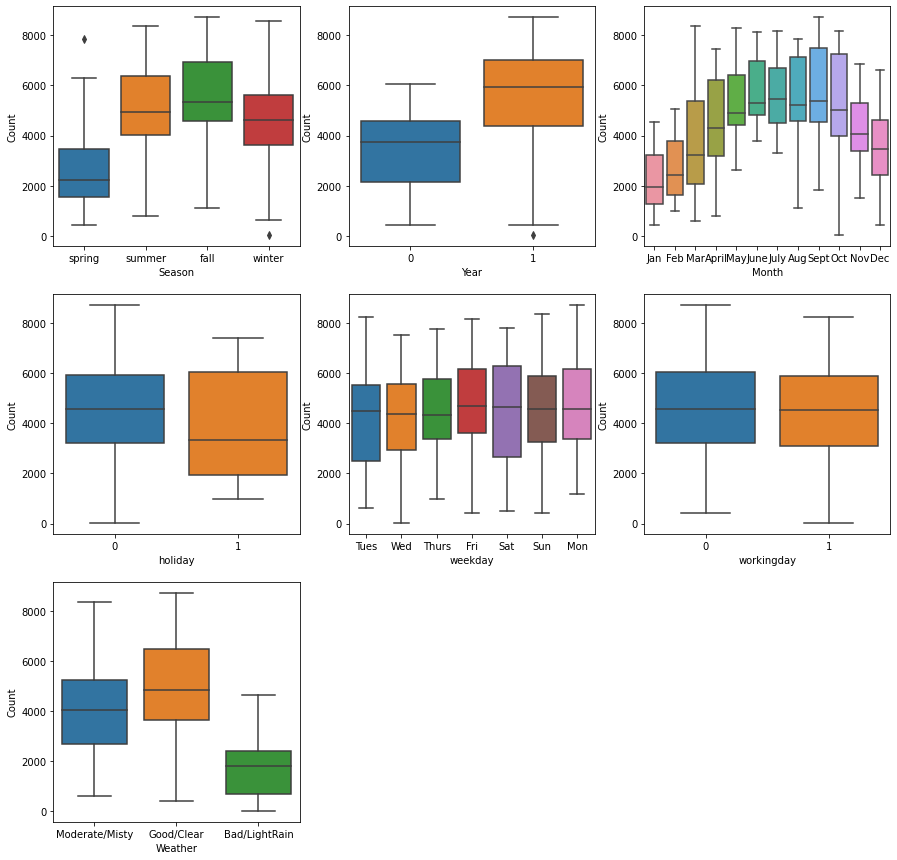

In [345]:
# Boxplot for categorical variables to see demands
vars_cat = ['Season','Year','Month','holiday','weekday','workingday','Weather']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='Count')
plt.show()

**Insights:**
    
    Here many insights can be drawn from the plots

    1. Season 3: fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is              decreasing 
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The clear weather has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

Regplot for the variables Count & Temp and the correlation between these two are:
          Count      temp
Count  1.000000  0.627044
temp   0.627044  1.000000


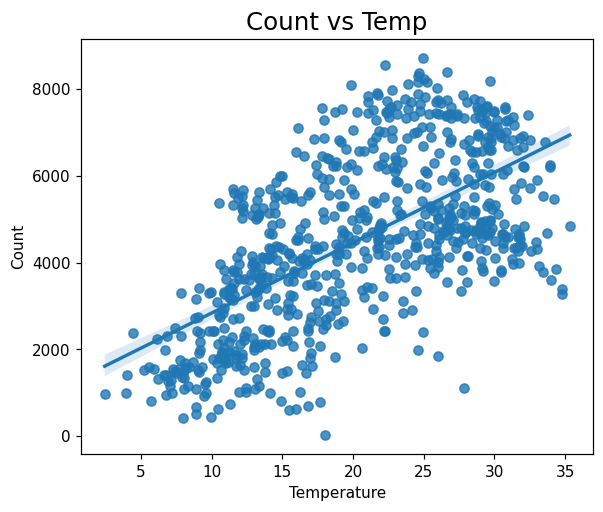

In [346]:
print('Regplot for the variables Count & Temp and the correlation between these two are:')
s1 = df[['Count','temp']]
print(s1.corr(method='pearson'))
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data=df,y="Count",x="temp")
plt.xlabel("Temperature")
plt.show()

**Insights:**
- **Demand for bikes is positively correlated to temp.**
- **We can see that count is linearly increasing with temp indicating linear relation.**

Regplot for the variables Count & Humidity and the correlation between these two are:
             Count  Humidity
Count     1.000000 -0.098543
Humidity -0.098543  1.000000


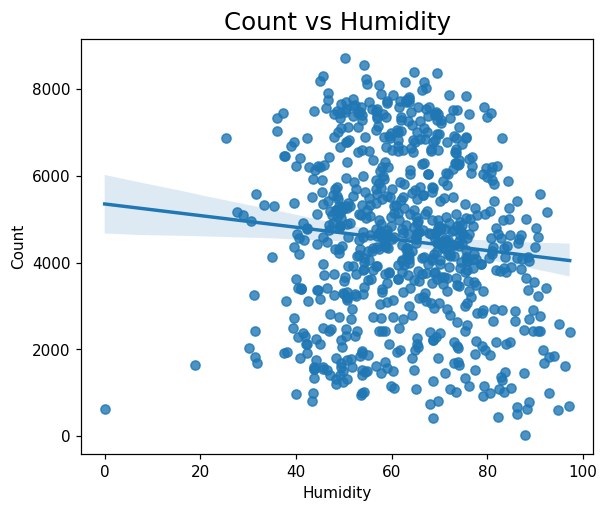

In [347]:
print('Regplot for the variables Count & Humidity and the correlation between these two are:')
s2 = df[['Count','Humidity']]
print(s2.corr(method='pearson'))
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=df,y="Count",x="Humidity")
plt.xlabel("Humidity")
plt.show()

**Insights**
- **Hum is values are more scattered around.**
- **Although we can see count decreasing with increase in humidity.**

Regplot for the variables Count & windspeed and the correlation between these two are:
              Count  windspeed
Count      1.000000  -0.235132
windspeed -0.235132   1.000000


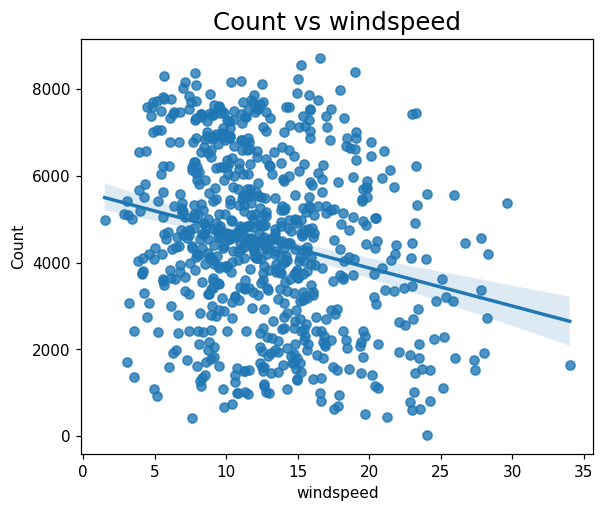

In [348]:
print('Regplot for the variables Count & windspeed and the correlation between these two are:')
s3 = df[['Count','windspeed']]
print(s3.corr(method='pearson'))
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs windspeed",fontsize=16)
sns.regplot(data=df,y="Count",x="windspeed")
plt.xlabel("windspeed")
plt.show()

**Insights**
- **Windspeed is values are more scattered around.**
- **Although we can see count decreasing with increase in windspeed.**

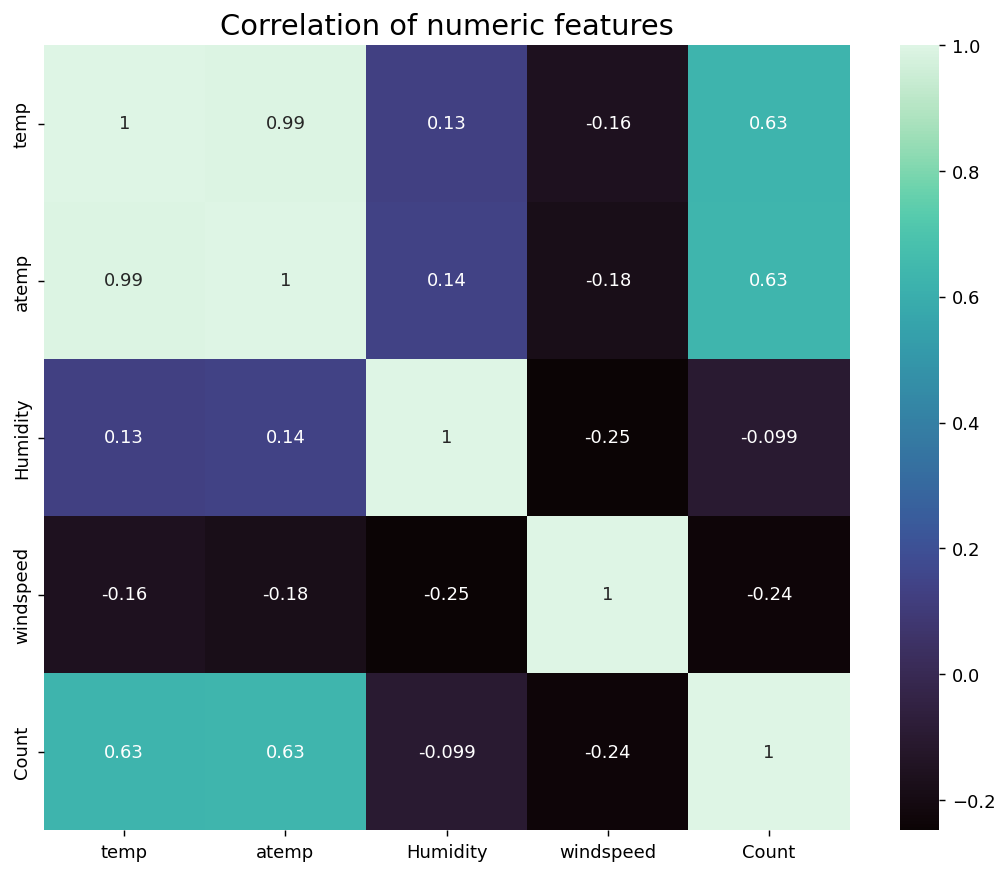

In [349]:
num_features = ["temp","atemp","Humidity","windspeed","Count"]
plt.figure(figsize=(10,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True,cmap="mako")
plt.show()

**Insights**
- **Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.**
- **Temp and Atemp also have high correlation with count variable.**

## Data Preparation for Linear Regression 

#### Create dummy variables for all categorical variables

In [350]:
df = pd.get_dummies(data=df,columns=["Season","Month","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["Weather"])

In [351]:
#Print columns after creating dummies
df.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'Season_spring', 'Season_summer', 'Season_winter',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'Weather_Bad/LightRain',
       'Weather_Good/Clear', 'Weather_Moderate/Misty'],
      dtype='object')

In [352]:
#Print few rows to inspect
df.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,...,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,Weather_Bad/LightRain,Weather_Good/Clear,Weather_Moderate/Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,1,0


## Model Building

### Split Data into training and test

In [353]:
# Checking shape before splitting
df.shape

(730, 31)

In [354]:
model_df = df

In [355]:
model_df.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,...,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,Weather_Bad/LightRain,Weather_Good/Clear,Weather_Moderate/Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,1,0


In [356]:
#y to contain only target variable
y=model_df.pop('Count')

#X is all remaining variable also our independent variables
X=model_df

#Train Test split with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [357]:
#Inspect independent variables
X.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,...,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,Weather_Bad/LightRain,Weather_Good/Clear,Weather_Moderate/Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [358]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp, Humidity, windspeed

In [359]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [360]:
# Let us scale continuous variables
num_vars = ['temp','atemp','Humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [361]:
#Inspect stats fro Training set after scaling
X_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,...,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,Weather_Bad/LightRain,Weather_Good/Clear,Weather_Moderate/Misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.133072,0.150685,0.142857,0.133072,0.148728,0.156556,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.339986,0.358092,0.350270,0.339986,0.356169,0.363738,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [362]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [363]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr, n_features_to_select=15) 
rfe = rfe.fit(X_train,y_train)

In [364]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', False, 8),
 ('Season_winter', True, 1),
 ('Month_Aug', False, 13),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 9),
 ('Month_Jan', False, 15),
 ('Month_July', True, 1),
 ('Month_June', False, 11),
 ('Month_Mar', True, 1),
 ('Month_May', False, 2),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 4),
 ('Month_Sept', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 16),
 ('weekday_Sun', False, 12),
 ('weekday_Thurs', False, 6),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 7),
 ('Weather_Bad/LightRain', True, 1),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Misty', False, 3)]

#### Manual elimination

Function to build a model using statsmodel api

In [365]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

Function to calculate VIFs and print them

In [366]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [367]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['Year', 'holiday', 'temp', 'atemp', 'Humidity', 'windspeed',
       'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear'],
      dtype='object')

In [368]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Season_summer', 'Month_Aug', 'Month_Feb', 'Month_Jan',
       'Month_June', 'Month_May', 'Month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'Weather_Moderate/Misty'],
      dtype='object')

In [369]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['Year', 'holiday', 'temp', 'atemp', 'Humidity', 'windspeed',
       'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']]

In [370]:
X_train_rfe.shape

(511, 15)

### Model 1

Model 1 - Start with all variables selected by RFE

In [371]:
cols = ['Year', 'holiday', 'temp', 'atemp', 'Humidity', 'windspeed',
       'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          4.43e-186
Time:                        03:03:19   Log-Likelihood:                -4123.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     495   BIC:                             8348.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2744.85

### Model 2

In [372]:
# removing feature - atemp due very high VIF values as all the p-values < 0.05.
cols = ['Year', 'holiday', 'temp', 'Humidity', 'windspeed',
       'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.03e-186
Time:                        03:03:20   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2792.37

### Model 3

In [373]:
# removing feature - 'Humidity' due very high VIF values as all the p-values < 0.05. even temp has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.
cols = ['Year', 'holiday', 'temp', 'windspeed', 'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.75e-184
Time:                        03:03:20   Log-Likelihood:                -4133.2
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1806.45

### Model 4

In [374]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['Year', 'temp', 'windspeed', 'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.1
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          6.26e-184
Time:                        03:03:21   Log-Likelihood:                -4137.3
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1786.29

### Model 5

In [375]:
# removing feature - 'windspeed' due very high VIF values as all the p-values < 0.05. even temp has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.
cols = ['Year', 'temp', 'Season_spring', 'Season_winter', 'Month_Dec', 'Month_July',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          6.34e-182
Time:                        03:03:22   Log-Likelihood:                -4144.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1336.04

### Model 6

In [376]:
# Dropping the variable Season_spring as it has negative coefficient 
cols = ['Year', 'temp', 'Season_spring', 'Season_winter', 'Month_Dec',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          2.68e-181
Time:                        03:03:22   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8367.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1494.07

---
**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.**

In [377]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [378]:
#Let us build the finalmodel using sklearn
cols = ['Year', 'temp', 'Season_spring', 'Season_winter', 'Month_Dec',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1494.078372520437 [ 1993.14153187  3251.13386946 -1380.11543644   799.6428075
  -537.68997457   520.95778869  -727.84435645   507.05375093
 -1697.23383422   684.41536012]


## Model Evaluation 
### Residual Analysis

In [379]:
y_train_pred = lr.predict(X_train[cols])

In [380]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

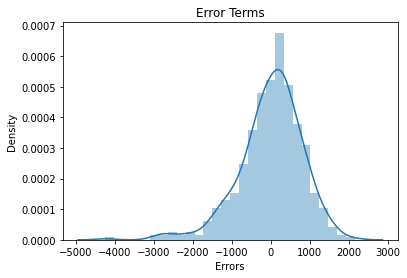

In [381]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

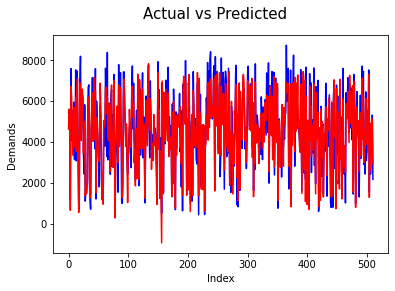

In [382]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [383]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8237463658529075

#### Linearity Check

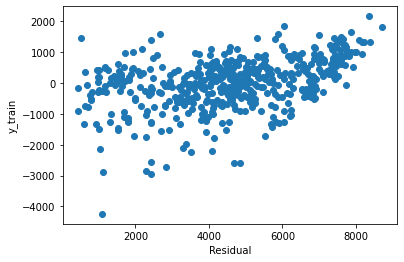

In [384]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [385]:
#Scale variables in X_test
num_vars = ['temp','atemp','Humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [386]:
#Columns from our final model
cols = ['Year', 'temp', 'Season_spring', 'Season_winter', 'Month_Dec',
       'Month_Mar', 'Month_Nov', 'Month_Sept', 'Weather_Bad/LightRain',
       'Weather_Good/Clear']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for test predictions

In [387]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7992705361478063

**Insights**

R2 value for predictions on test data (0.78.9) is almost same as R2 value of train data(0.79.7). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

#### Plot Test vs Predicted test values

In [388]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

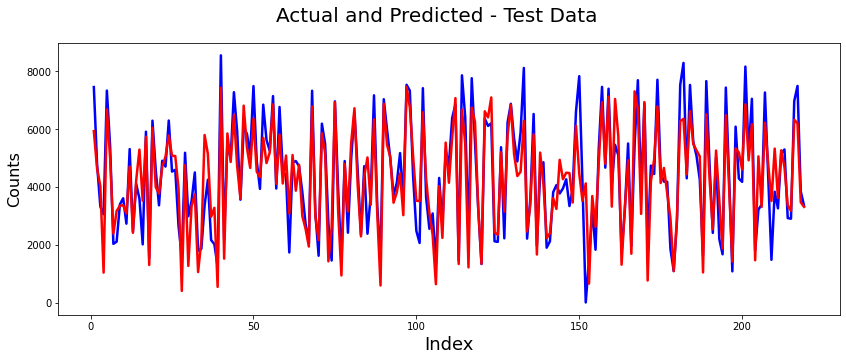

In [389]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [390]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 79.93
Train data r^2 : 82.37


In [391]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 76.72
Train data adjusted r^2 : 81.27


## FINAL RESULT COMPARISON: 
- Test data r^2 : 79.93
- Train data r^2 : 82.37

- Test data adjusted r^2 : 76.72
- Train data adjusted r^2 : 81.27

This seems to be a really good model that can very well 'Generalize' various datasets. 

**As per our final Model, the below predictor variables influences bike booking :**
- Temperature (temp)
- September Month 
- Year 
- Spring Seaon
- Winter Seson
- December Month
- March Month
- November Month
- Clear_weather

**Result**
- From data dictionary and EDA we get that **Temperature, September_Month and Clear_Weather** is play a major role in the demand of bikes.